# Liver Disease Prediction

In [3]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [4]:
df=pd.read_csv('Liverr.csv')

In [5]:
df.shape

(499, 11)

In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

Filtering categorical data

In [8]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

## Distribution of Numerical Features

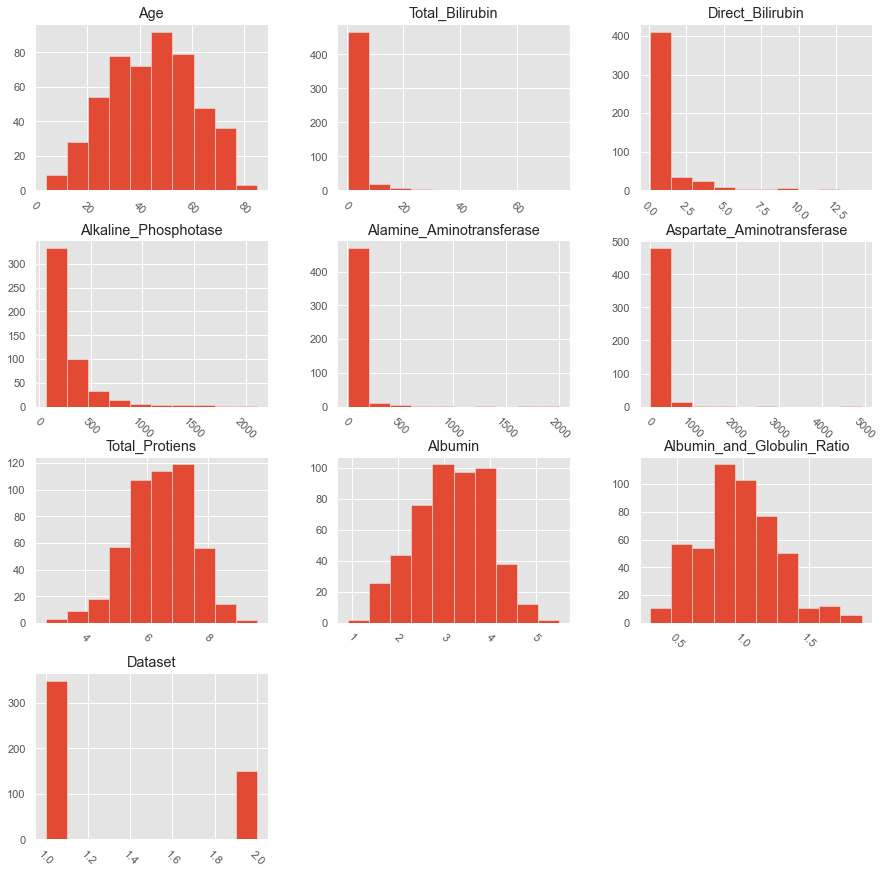

In [9]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,495.000000,499.000000
mean,44.565130,2.601804,1.116232,296.266533,82.821643,108.897796,6.443287,3.169339,0.961636,1.300601
std,16.543398,5.125182,2.068670,257.709230,194.552381,307.396797,1.089587,0.800453,0.294138,0.458980
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.500000,0.800000,0.200000,175.000000,23.000000,24.500000,5.700000,2.600000,0.800000,1.000000
50%,45.000000,0.900000,0.300000,205.000000,33.000000,40.000000,6.500000,3.100000,1.000000,1.000000
75%,58.000000,2.150000,1.000000,298.000000,59.500000,79.500000,7.200000,3.800000,1.100000,2.000000
max,85.000000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,1.900000,2.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [11]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## Distribution of categorical data

In [12]:
df.describe(include=['object'])

,Gender
count,499
unique,2
top,Male
freq,371


## Bar plots for categorical Features

<AxesSubplot:xlabel='count', ylabel='Gender'>

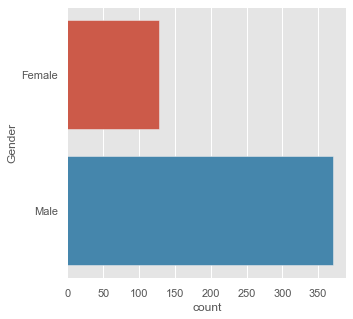

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [14]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


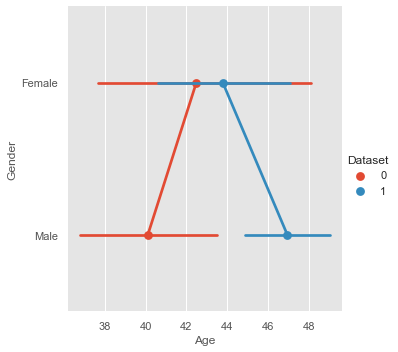

In [15]:
sns.factorplot (x="Age", y="Gender", hue="Dataset", data=df);

Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  371
Number of patients that are female:  128


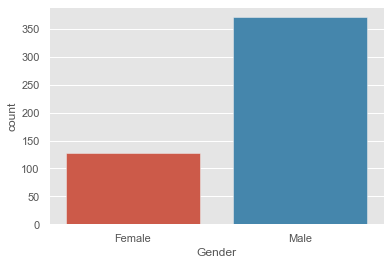

In [16]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [17]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

#### 2-D Scatter Plot

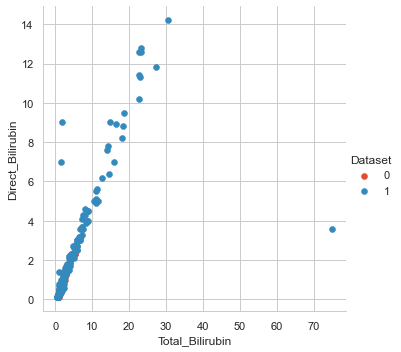

In [18]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

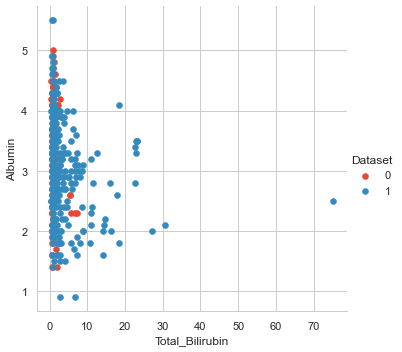

In [19]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

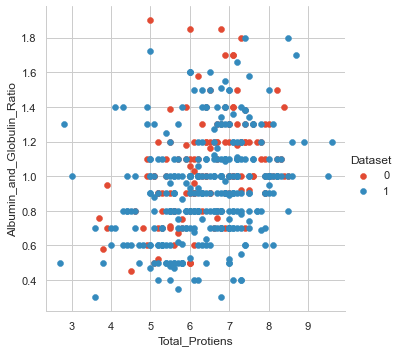

In [20]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [21]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.043131,0.057166,0.066281,0.087143,-0.094979,-0.027071,-0.220561,-0.274429,-0.201340,0.149885
Gender,-0.043131,1.000000,-0.057388,-0.062125,0.017216,-0.092487,-0.085489,0.095106,0.069005,-0.013040,-0.045267
Total_Bilirubin,0.057166,-0.057388,1.000000,0.781692,0.267990,0.273936,0.248927,-0.057249,-0.188515,-0.241793,0.182992
Direct_Bilirubin,0.066281,-0.062125,0.781692,1.000000,0.345070,0.336857,0.305257,-0.053132,-0.204653,-0.271391,0.223405
Alkaline_Phosphotase,0.087143,0.017216,0.267990,0.345070,1.000000,0.123986,0.168482,-0.034677,-0.177873,-0.280876,0.192054
Alamine_Aminotransferase,-0.094979,-0.092487,0.273936,0.336857,0.123986,1.000000,0.793516,-0.038639,-0.025621,0.006244,0.163782
Aspartate_Aminotransferase,-0.027071,-0.085489,0.248927,0.305257,0.168482,0.793516,1.000000,-0.029641,-0.071488,-0.062451,0.143515
Total_Protiens,-0.220561,0.095106,-0.057249,-0.053132,-0.034677,-0.038639,-0.029641,1.000000,0.833068,0.299722,-0.030143
Albumin,-0.274429,0.069005,-0.188515,-0.204653,-0.177873,-0.025621,-0.071488,0.833068,1.000000,0.740968,-0.139916
Albumin_and_Globulin_Ratio,-0.201340,-0.013040,-0.241793,-0.271391,-0.280876,0.006244,-0.062451,0.299722,0.740968,1.000000,-0.178523


<AxesSubplot:>

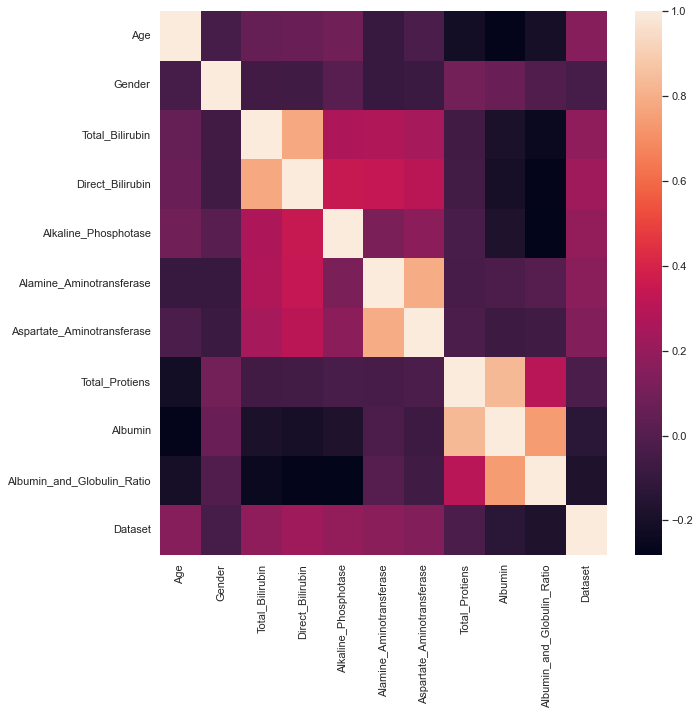

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

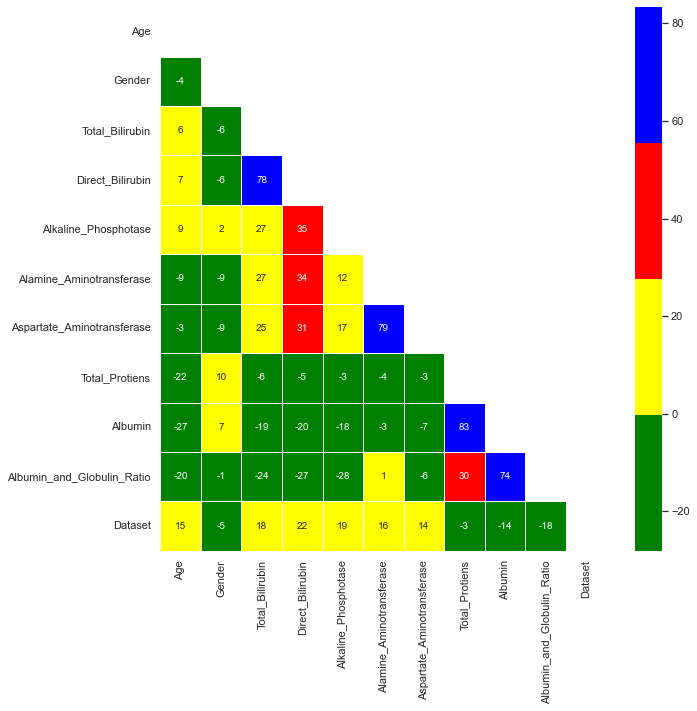

In [23]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [24]:
df = df.drop_duplicates()
print( df.shape )

(486, 11)


There were 13 duplicates

## Removing Outliers

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

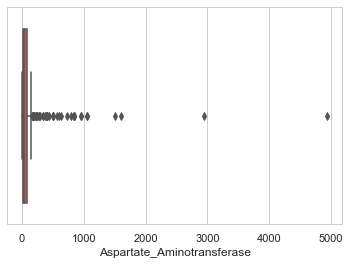

In [25]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [26]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [27]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(485, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

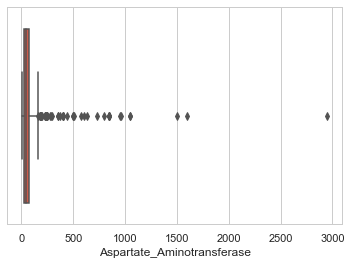

In [28]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [29]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [30]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(484, 11)

In [31]:
df.isnull().values.any()

True

In [32]:
df=df.dropna(how='any')  

In [33]:
df.shape

(480, 11)

In [34]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Machine Learning Models

### Data Preparation

In [35]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [36]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=df.Dataset)

In [37]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(336, 10) (144, 10) (336,) (144,)


### Data standardization

In [38]:
train_mean = X_train.mean()
train_std = X_train.std()

In [39]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [40]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,3.360000e+02,3.360000e+02,3.360000e+02,336.000000,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02
mean,-1.467080e-16,-3.965082e-17,-6.079793e-17,0.000000,9.516197e-17,-2.643388e-17,5.286776e-18,-3.700743e-16,8.723181e-17,-1.586033e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.451507e+00,-5.993759e-01,-4.988072e-01,-0.486103,-8.712065e-01,-3.896409e-01,-4.559108e-01,-3.255502e+00,-2.774216e+00,-2.211021e+00
25%,-8.027510e-01,-5.993759e-01,-4.280740e-01,-0.437275,-4.603613e-01,-3.140188e-01,-3.814324e-01,-7.116678e-01,-6.463362e-01,-7.274101e-01
50%,-8.905320e-03,-5.993759e-01,-3.959225e-01,-0.388446,-3.549232e-01,-2.558479e-01,-2.989743e-01,1.514187e-02,-2.048904e-02,-6.707487e-02
75%,8.460054e-01,1.663437e+00,-8.726830e-02,-0.046648,-4.588031e-02,-9.878658e-02,-1.047985e-01,6.511003e-01,7.305275e-01,5.332299e-01
max,2.372632e+00,1.663437e+00,7.217548e+00,6.398684,6.571273e+00,9.324892e+00,8.002703e+00,2.831529e+00,2.357730e+00,3.277480e+00


In [41]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [42]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,-0.293027,-0.049387,0.125110,0.017778,-0.064059,-0.022962,-0.049863,0.220188,0.248973,0.215450
std,1.029601,0.973972,1.891072,1.046846,0.795244,0.870521,0.813780,0.965717,0.992820,1.002499
min,-2.573637,-0.599376,-0.524528,-0.486103,-0.765768,-0.389641,-0.445271,-3.346353,-2.774216,-1.867989
25%,-1.016479,-0.599376,-0.421644,-0.437275,-0.489448,-0.315473,-0.381432,-0.348263,-0.395997,-0.495864
50%,-0.222633,-0.599376,-0.395922,-0.388446,-0.347652,-0.250031,-0.298974,0.378547,0.355019,0.190199
75%,0.479615,-0.599376,-0.100129,-0.046648,0.032289,-0.116238,-0.095489,0.832803,0.980866,0.876261
max,1.945176,1.663437,18.663474,5.617431,4.644300,6.823545,5.076768,2.922381,2.983577,2.934449


# LR

In [43]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [44]:
# model predictions

y_pred = lr.predict(X_test)

In [45]:
# accuracy score

print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

0.7053571428571429
0.7291666666666666


In [46]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[11 33]
 [ 6 94]]


In [47]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.25      0.36        44
           1       0.74      0.94      0.83       100

    accuracy                           0.73       144
   macro avg       0.69      0.59      0.59       144
weighted avg       0.71      0.73      0.69       144



# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
# model predictions 

y_pred = knn.predict(X_test)

In [50]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.7678571428571429
0.6736111111111112


In [51]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[20 24]
 [23 77]]


In [52]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46        44
           1       0.76      0.77      0.77       100

    accuracy                           0.67       144
   macro avg       0.61      0.61      0.61       144
weighted avg       0.67      0.67      0.67       144



# SVM

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [54]:
# best parameters

grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [55]:
# best score 

grid_search.best_score_

0.6994293239683934

In [56]:
svc = SVC(C = 0.01, gamma = 0.0001, probability=True)
svc.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [57]:
# model predictions 

y_pred = svc.predict(X_test)

In [58]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.6994047619047619
0.6944444444444444


In [59]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[  0  44]
 [  0 100]]


In [60]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.69      1.00      0.82       100

    accuracy                           0.69       144
   macro avg       0.35      0.50      0.41       144
weighted avg       0.48      0.69      0.57       144



# DT

In [61]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.5972222222222222 

Confusion Matrix :- 
[[17 27]
 [31 69]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.35      0.39      0.37        44
           1       0.72      0.69      0.70       100

    accuracy                           0.60       144
   macro avg       0.54      0.54      0.54       144
weighted avg       0.61      0.60      0.60       144



In [62]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 24, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [63]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}
0.7232142857142857


In [64]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.7291666666666666
Test Accuracy of Decision Tree Classifier is 0.6597222222222222 

Confusion Matrix :- 
[[ 0 44]
 [ 5 95]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.68      0.95      0.79       100

    accuracy                           0.66       144
   macro avg       0.34      0.47      0.40       144
weighted avg       0.47      0.66      0.55       144



# RF

In [65]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 16, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 2, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features='auto',
                       min_samples_leaf=4, n_estimators=130)

In [66]:
y_pred = rand_clf.predict(X_test)

In [67]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9494047619047619
0.6736111111111112


In [68]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 7 37]
 [10 90]]


In [69]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.16      0.23        44
           1       0.71      0.90      0.79       100

    accuracy                           0.67       144
   macro avg       0.56      0.53      0.51       144
weighted avg       0.62      0.67      0.62       144



# Gradient Boosting Classifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [71]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [72]:
# best score

grid_search_gbc.best_score_

0.7053308823529412

In [73]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential')

In [74]:
y_pred = gbc.predict(X_test)

In [75]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.9285714285714286
0.6944444444444444


In [76]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[13 31]
 [13 87]]


In [77]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.30      0.37        44
           1       0.74      0.87      0.80       100

    accuracy                           0.69       144
   macro avg       0.62      0.58      0.58       144
weighted avg       0.66      0.69      0.67       144



# XGBoost

In [78]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 100, n_estimators = 300)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [79]:
y_pred = xgb.predict(X_test)

In [80]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.9910714285714286
0.7013888888888888


In [81]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[12 32]
 [11 89]]


In [82]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.27      0.36        44
           1       0.74      0.89      0.81       100

    accuracy                           0.70       144
   macro avg       0.63      0.58      0.58       144
weighted avg       0.67      0.70      0.67       144



# Model Comparison

In [83]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,72.92
6,XgBoost,70.14
2,SVM,69.44
5,Gradient Boosting Classifier,69.44
1,KNN,67.36
4,Random Forest Classifier,67.36
3,Decision Tree Classifier,65.97


In [84]:
import pickle
model = svc
pickle.dump(model, open("liver.pkl",'wb'))

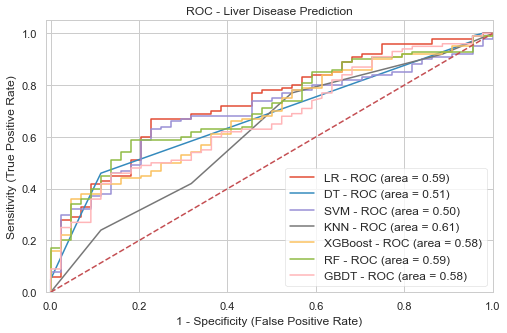

In [85]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Liver Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[72.92, 65.97, 69.44, 67.36, 70.14, 67.36, 69.44]
[59.5, 54.449999999999996, 50.0, 61.23, 58.14, 55.089999999999996, 58.269999999999996]


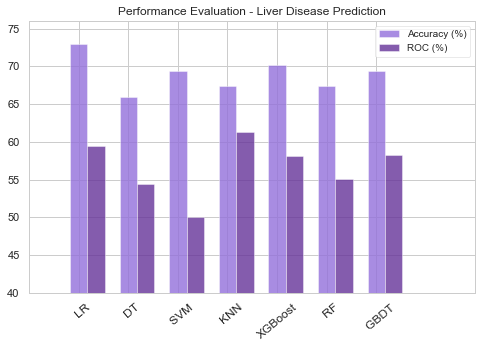

In [86]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(ran_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([40, 76])

plt.title('Performance Evaluation - Liver Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()